# Proyek Analisis Data: Tiantan Air Quality
- **Nama:** Alfadila Anas
- **Email:** alf.anas@geoit.dev
- **ID Dicoding:** alf_anas

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara di stasiun Tiantan?
- Apakah ada korelasi antar tiap polutan di stasiun Tiantan?
- Apakah ada korelasi antara cuaca dan kualitas udara di stasiun Tiantan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Data Wrangling

### Gathering Data

In [2]:
tiantan_data = pd.read_csv("./data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Dari output menandakan bahwa file berhasil dibaca serta menampilkan data teratas dari dataset
- Serta terdapat 18 kolom pada dataset dari kolom `No` hingga `station`

**Penjelasan Kolom**
- `No` : Nomor urut setiap baris data dalam dataset. Biasanya digunakan sebagai indeks.
- `year` : Tahun pengambilan data. Menunjukkan tahun spesifik saat data diukur.
- `month` : Bulan pengambilan data (1–12). Menunjukkan bulan dalam setahun saat data diukur.
- `day` : Hari pengambilan data (1–31). Menunjukkan tanggal spesifik dalam satu bulan.
- `hour` : Jam pengambilan data (0–23). Menunjukkan waktu spesifik dalam satu hari saat data diukur.
- `PM2.5` : Konsentrasi partikel halus dengan diameter kurang dari 2,5 mikrometer (dalam µg/m³). Sering digunakan sebagai indikator kualitas udara karena partikel ini dapat masuk ke dalam sistem pernapasan manusia.
- `PM10` : Konsentrasi partikel kasar dengan diameter kurang dari 10 mikrometer (dalam µg/m³). Juga memengaruhi kualitas udara, meskipun dampaknya tidak seberbahaya PM2.5.
- `SO2` : Konsentrasi sulfur dioksida (dalam µg/m³). Gas ini biasanya berasal dari aktivitas pembakaran bahan bakar fosil dan dapat menyebabkan gangguan pernapasan.
- `NO2` : Konsentrasi nitrogen dioksida (dalam µg/m³). Gas ini sering dihasilkan dari emisi kendaraan bermotor dan industri.
- `CO` : Konsentrasi karbon monoksida (dalam µg/m³). Gas ini berbahaya jika terhirup dalam jumlah tinggi, terutama di daerah dengan ventilasi buruk.
- `O3` : Konsentrasi ozon (dalam µg/m³). Ozon di permukaan tanah dapat menyebabkan iritasi pada saluran pernapasan.
- `TEMP` : Suhu udara saat pengukuran (dalam derajat Celcius). Data ini berguna untuk menganalisis hubungan antara suhu dan kualitas udara.
- `PRES` : Tekanan udara saat pengukuran (dalam hPa). Tekanan udara dapat memengaruhi pola distribusi polutan di atmosfer.
- `DEWP` : Titik embun (dew point) saat pengukuran (dalam derajat Celcius). Titik embun mencerminkan tingkat kelembapan udara.
- `RAIN` : Jumlah curah hujan saat pengukuran (dalam mm). Hujan dapat membantu "membersihkan" polusi di udara.
- `wd` : Arah angin saat pengukuran (dalam bentuk singkatan, misalnya: "N" untuk utara, "E" untuk timur). Arah angin memengaruhi penyebaran polutan.
- `WSPM` : Kecepatan angin saat pengukuran (dalam m/s). Kecepatan angin juga memengaruhi distribusi polutan di udara.
- `station` : Nama stasiun pengukuran (dalam hal ini, "Tiantan"). Menunjukkan lokasi pengumpulan data.


### Assessing Data

#### Informasi Terkait Dataset

In [3]:
tiantan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight**
- Output di atas menampilkan tipe data pada ke-18 kolom
- Tipe int64 merupakan tipe data integer
- Tipe float64 merupakan tipe data angka yang memiliki koma
- Tipe object merupakan teks/string

#### Jumlah data kosong pada Dataset

In [4]:
tiantan_data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight**
- Output menampilkan terdapat jumlah data kosong pada tiap kolom

#### Jumlah data duplikat pada Dataset

In [5]:
print(tiantan_data.duplicated().sum())

0


**Insight**
- Output mengeluarkan angka 0, berarti tika ditemukan data duplikat pada dataset

#### Menilai ringkasan parameter statistik pada Dataset

In [6]:
# Menggabungkan data tanggal menjadi 1 kolom
tiantan_data['datetime'] = pd.to_datetime(
    tiantan_data[['year', 'month', 'day', 'hour']]
)
# Memfilter kolom tanggal
fields_to_exclude = ['year', 'month', 'day', 'hour']
filtered_data = tiantan_data.drop(columns=fields_to_exclude)

filtered_data.describe().round(2)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.00,34387.00,34467.00,33946.00,34320.00,33938.00,34221.00,35044.00,35044.00,35044.00,35044.00,35050.00,35064
mean,17532.50,82.16,106.36,14.37,53.16,1298.30,55.98,13.67,1012.55,2.45,0.06,1.86,2015-03-01 11:30:00
min,1.00,3.00,2.00,0.57,2.00,100.00,0.43,-16.80,987.10,-35.30,0.00,0.00,2013-03-01 00:00:00
25%,8766.75,22.00,41.00,3.00,28.00,500.00,8.00,3.10,1004.00,-8.80,0.00,1.00,2014-03-01 05:45:00
50%,17532.50,59.00,85.00,7.00,47.00,900.00,40.00,14.60,1012.20,3.00,0.00,1.50,2015-03-01 11:30:00
75%,26298.25,113.00,144.00,17.00,71.00,1600.00,81.00,23.50,1020.90,15.00,0.00,2.40,2016-02-29 17:15:00
max,35064.00,821.00,988.00,273.00,241.00,10000.00,674.00,41.10,1042.00,28.80,46.40,10.50,2017-02-28 23:00:00
std,10122.25,80.92,89.70,20.14,31.95,1170.59,59.08,11.46,10.27,13.81,0.79,1.28,NaN


**Insight:**
- Output menunjukkan hasil perhitungan statistik pada tiap kolom
- Dari output dapat diketahui bahwa total baris data yang dimiliki terdapat 35.064 data

### Cleaning Data

Karena tidak ada data yang duplikat, namun banyak data yang hilang/kosong, maka kita akan melakukan interpolasi untuk mengisi data kosong tersebut, karena dataset Air Quality merupakan data berurutan berdasarkan waktu

In [7]:
print("Sampel data kosong pada kolom PM2.5")
tiantan_data[tiantan_data["PM2.5"].isna()]

Sampel data kosong pada kolom PM2.5


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
174,175,2013,3,8,6,NaN,NaN,NaN,NaN,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan,2013-03-08 06:00:00
175,176,2013,3,8,7,NaN,NaN,NaN,NaN,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan,2013-03-08 07:00:00
178,179,2013,3,8,10,NaN,373.0,116.2392,211.6643,NaN,107.0,19.9,1002.4,-5.2,0.0,E,0.9,Tiantan,2013-03-08 10:00:00
1282,1283,2013,4,23,10,NaN,NaN,NaN,NaN,NaN,NaN,12.6,1007.1,8.3,0.0,SSE,1.1,Tiantan,2013-04-23 10:00:00
1283,1284,2013,4,23,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1006.6,8.2,0.0,SE,1.5,Tiantan,2013-04-23 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Tiantan,2017-02-21 13:00:00
35017,35018,2017,2,27,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1019.8,-6.9,0.0,NE,1.3,Tiantan,2017-02-27 01:00:00
35030,35031,2017,2,27,14,NaN,NaN,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Tiantan,2017-02-27 14:00:00
35031,35032,2017,2,27,15,NaN,NaN,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan,2017-02-27 15:00:00


#### Mengurutkan dataset berdasrakan kolom datetime

In [8]:
tiantan_data = tiantan_data.sort_values(by='datetime')

# Reset index untuk mengikuti datetime
tiantan_data.reset_index(drop=True, inplace=True)

#### Memplot data dan melihat tren data

Sebelum melakukan cleaning data, lebih baik melakukan plot untuk melihat tren data. Serta tampilkan garis min, max, average, batas atas dan bawah dari Interquartile Range

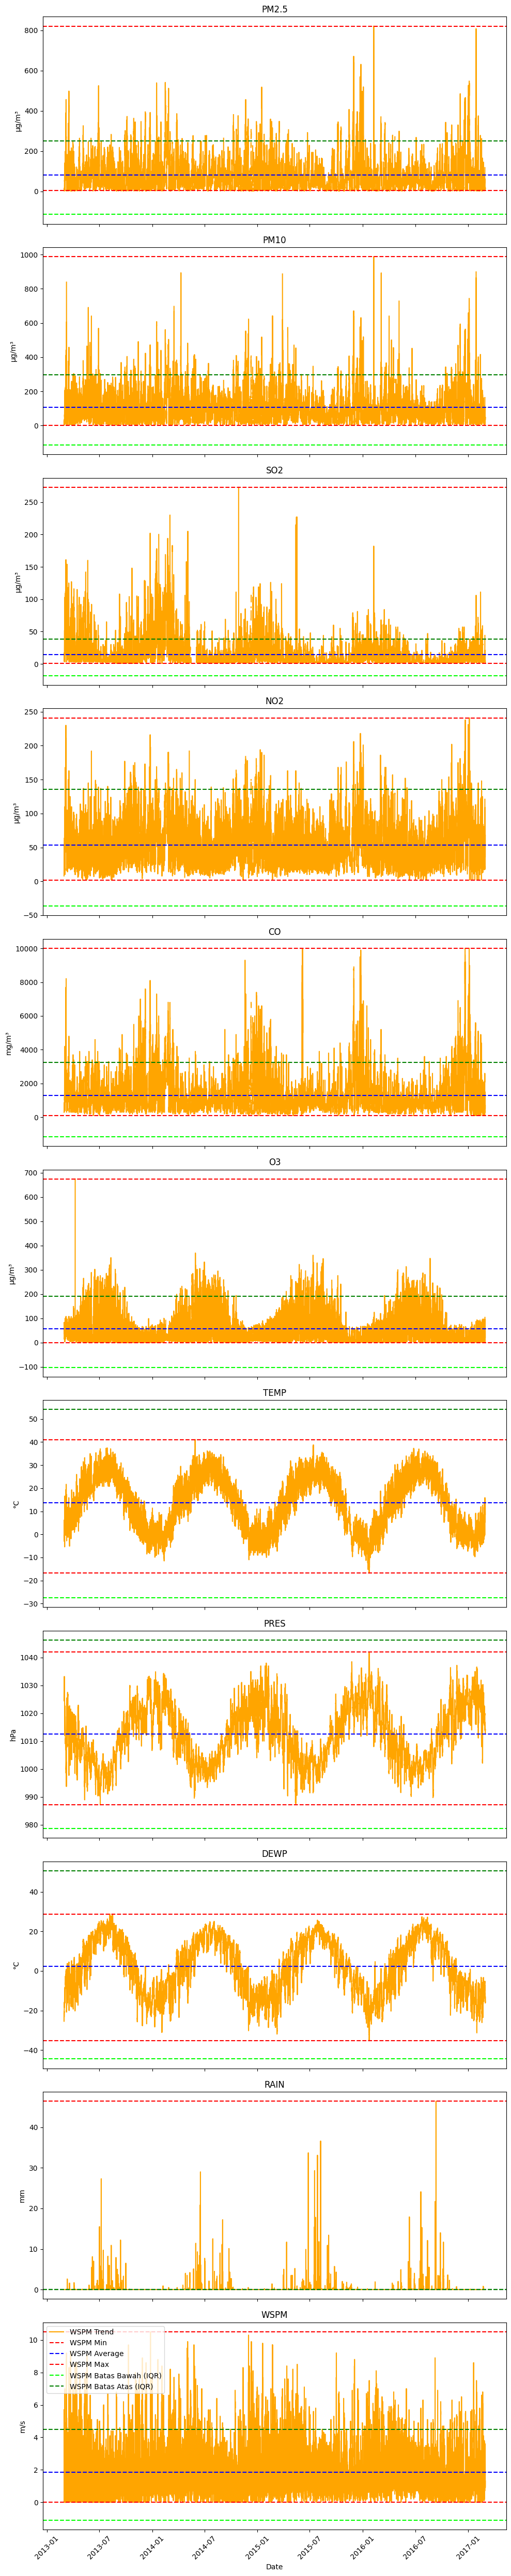

In [9]:
# Buat subplots berdasarkan kolom nuerik
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(10, 50), sharex=True)

# Daftar kolom yang akan di buat subplot
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
labels = ["µg/m³", "µg/m³", "µg/m³", "µg/m³", "mg/m³", "µg/m³", "°C", "hPa", "°C", "mm", "m/s"]


# Loop kolom untuk menampilkan plot
for i, var in enumerate(columns):
    # Ambil data kolom
    data = tiantan_data[var]
    
    # Hitung IQR data
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Buat plot garis dari data
    axes[i].plot(tiantan_data['datetime'], data, color='orange', label=f'{var} Trend')
    
    # Tambah garis horizontal buat min, max dan average
    axes[i].axhline(data.min(), color='red', linestyle='--', label=f'{var} Min')
    axes[i].axhline(data.mean(), color='blue', linestyle='--', label=f'{var} Average')
    axes[i].axhline(data.max(), color='red', linestyle='--', label=f'{var} Max')
    
    # Tambah garis horizontal buat IQR
    axes[i].axhline(lower_bound, color='lime', linestyle='--', label=f'{var} Batas Bawah (IQR)')
    axes[i].axhline(upper_bound, color='green', linestyle='--', label=f'{var} Batas Atas (IQR)')
    
    # Tambah judul dan label
    axes[i].set_title(f'{var}')
    axes[i].set_ylabel(f'{labels[i]}')
    axes[i].tick_params(axis='x', rotation=45)

# Tampilakn X-Label
plt.xlabel('Date')

# Ssuaikn layoutagar tidak overlap
plt.tight_layout()

# abah legenda
plt.legend(loc='upper left')

# Tampilkan plot
plt.show()

**Insight**

- Dari plot yang dilihat, hampir semua kolom berada dalam nilai IQR yang sesuai
- Untuk data RAIN akan kita abaikan dan anggap sesuai, karena tren menunjukkan bahwa data tersebut memang memungkinkan
- Khusus untuk kolom PM2.5, PM10, SO2, NO2, CO, O3, jika data diluar IQR dihapus, maka akan membuang cukup banyak data, sehingga kita akan bersihkan menggunakan IQR lokal

#### Tampilkan 20 data tertinggi dan data tetangganya (sebelum dan sesudah)

Pastikan pada datanya tidak terjadi lonjakan yang signifikan dan ubah data outlier menjadi NaN

In [10]:
# Daftar kolom yang akan di analisis
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Iterasi kolom
for col in columns:
    # Urutkan data untuk mendapatkan 20 data tertinggi
    largest_values = tiantan_data[col].sort_values(ascending=False).head(20)

    print(f"\n{'-'*40}")
    print(f"20 Data Tertinggi dan Data Tetangganya pada Kolom {col}:\n")
    
    # Konversi ke dataframe untuk lebih mudah dibaca
    data_list = []
    for index in largest_values.index:
        # Dapatkan data tetangganya (sebelum 5, data tertinggi, setelah 5)
        neighbors = {
            f'Sebelum {i}': tiantan_data[col].iloc[index - i] if index - i >= 0 else 'N/A'
            for i in range(1, 6)
        }
        neighbors['Tertinggi'] = tiantan_data[col].iloc[index]
        neighbors.update({
            f'Setelah {i}': tiantan_data[col].iloc[index + i] if index + i < len(tiantan_data) else 'N/A'
            for i in range(1, 6)
        })
        
        # Simpan data dalam format dictionary
        data_list.append({'No': tiantan_data.loc[index, "No"], **neighbors})

        # Simpan data tetangga dan data tertinggi ke variabel baru
        neighbor_values = [
            tiantan_data[col].iloc[index - i] if index - i >= 0 else None
            for i in range(1, 6)
        ] + [
            tiantan_data[col].iloc[index + i] if index + i < len(tiantan_data) else None
            for i in range(1, 6)
        ]
        
        # Buang data NaN/None
        neighbor_values = [val for val in neighbor_values if val is not None]
        
        # Hitung IQR lokal untuk dat aneighbor
        if len(neighbor_values) > 1:
            Q1 = pd.Series(neighbor_values).quantile(0.25)
            Q3 = pd.Series(neighbor_values).quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Check apakah data tertinggi merupakan outlier berdasarkan data tetangganya
            if tiantan_data[col].iloc[index] < lower_bound or tiantan_data[col].iloc[index] > upper_bound:
                print(f"Outlier detected for Index {index} (No: {tiantan_data.loc[index, 'No']}): {tiantan_data[col].iloc[index]}")

                # Ubah data outlier menjadi NaN
                tiantan_data.loc[index, col] = np.nan


    # Konversi ke dataframe untuk lebih mudah dibaca
    result_df = pd.DataFrame(data_list)

    # Print data tetangga
    # print(result_df.to_string(index=False))

    print(f"{'-'*50}")


----------------------------------------
20 Data Tertinggi dan Data Tetangganya pada Kolom PM2.5:

--------------------------------------------------

----------------------------------------
20 Data Tertinggi dan Data Tetangganya pada Kolom PM10:

Outlier detected for Index 34300 (No: 34301): 899.0
Outlier detected for Index 9732 (No: 9733): 894.0
Outlier detected for Index 26401 (No: 26402): 893.0
Outlier detected for Index 18182 (No: 18183): 887.0
Outlier detected for Index 34297 (No: 34298): 863.0
Outlier detected for Index 205 (No: 206): 839.0
Outlier detected for Index 26400 (No: 26401): 781.0
Outlier detected for Index 27887 (No: 27888): 728.0
Outlier detected for Index 34301 (No: 34302): 697.0
Outlier detected for Index 9153 (No: 9154): 697.0
--------------------------------------------------

----------------------------------------
20 Data Tertinggi dan Data Tetangganya pada Kolom SO2:

Outlier detected for Index 14533 (No: 14534): 273.0
Outlier detected for Index 19345 (No:

#### Mengisi data kosong pada kolom wd

Karena data pada kolom `wd` merupakan data object, maka akan kita isi dengan data yang paling sering muncul

In [11]:
# Mencari nilai modus pada dataset dan mengambil modus paling atas
wd_modus = tiantan_data['wd'].mode()[0]

# Ganti nilai kosong menggunakan data modus untuk kolom `wd`
tiantan_data['wd'] = tiantan_data['wd'].fillna(wd_modus, inplace=False)

#### Mengisi data kosong pada kolom numerikal lainnya

Kita akan melakukan interpolasi untuk mengisi data kosong tersebut

In [12]:
# Daftar kolom yang bisa diinterpolasi
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

tiantan_data[columns_to_interpolate] = tiantan_data[columns_to_interpolate].interpolate(method='linear', inplace=False)

#### Cek kembali data kosong pada kolom

In [13]:
tiantan_data.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

**Insight:**

- Output di atas menunjukkan bahwa sudah tidak ada lagi data kosong pada dataset

#### Plot kembali data

Plot kembali data dan pastikan data sudah tidak memiliki lonjakan tinggi

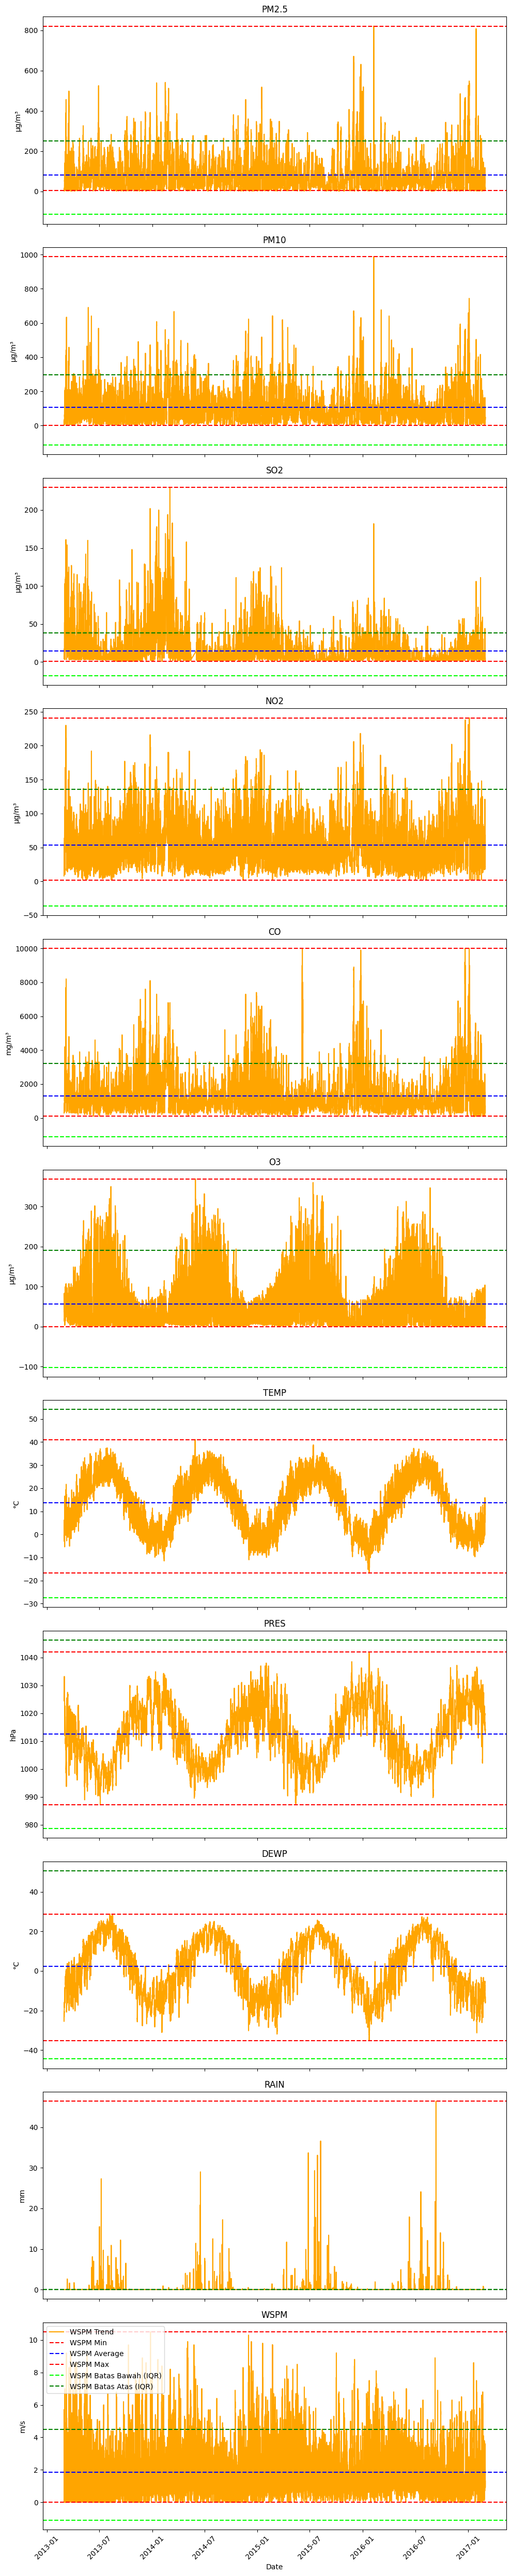

In [14]:
# Buat subplots berdasarkan kolom nuerik
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(10, 50), sharex=True)

# Daftar kolom yang akan di buat subplot
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
labels = ["µg/m³", "µg/m³", "µg/m³", "µg/m³", "mg/m³", "µg/m³", "°C", "hPa", "°C", "mm", "m/s"]


# Loop kolom untuk menampilkan plot
for i, var in enumerate(columns):
    # Ambil data kolom
    data = tiantan_data[var]
    
    # Hitung IQR data
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Buat plot garis dari data
    axes[i].plot(tiantan_data['datetime'], data, color='orange', label=f'{var} Trend')
    
    # Tambah garis horizontal buat min, max dan average
    axes[i].axhline(data.min(), color='red', linestyle='--', label=f'{var} Min')
    axes[i].axhline(data.mean(), color='blue', linestyle='--', label=f'{var} Average')
    axes[i].axhline(data.max(), color='red', linestyle='--', label=f'{var} Max')
    
    # Tambah garis horizontal buat IQR
    axes[i].axhline(lower_bound, color='lime', linestyle='--', label=f'{var} Batas Bawah (IQR)')
    axes[i].axhline(upper_bound, color='green', linestyle='--', label=f'{var} Batas Atas (IQR)')
    
    # Tambah judul dan label
    axes[i].set_title(f'{var}')
    axes[i].set_ylabel(f'{labels[i]}')
    axes[i].tick_params(axis='x', rotation=45)

# Tampilakn X-Label
plt.xlabel('Date')

# Ssuaikn layoutagar tidak overlap
plt.tight_layout()

# abah legenda
plt.legend(loc='upper left')

# Tampilkan plot
plt.show()

**Insight:**

- Hasil plot menunjukkan bahwa sudah tidak terjadi lonjakan tajam pada data

## Exploratory Data Analysis (EDA)

### Explore Dataset Air Quality Stasiun Tiantan

In [15]:
tiantan_data.describe(include="all").round(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064,35064.00,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064,NaN
mean,17532.50,2014.66,6.52,15.73,11.50,82.03,106.38,14.47,53.26,1304.98,55.95,13.67,1012.55,2.45,0.06,NaN,1.86,NaN,2015-03-01 11:30:00
min,1.00,2013.00,1.00,1.00,0.00,3.00,2.00,0.57,2.00,100.00,0.43,-16.80,987.10,-35.30,0.00,NaN,0.00,NaN,2013-03-01 00:00:00
25%,8766.75,2014.00,4.00,8.00,5.75,22.00,41.00,3.00,28.00,518.12,8.00,3.10,1004.00,-8.80,0.00,NaN,1.00,NaN,2014-03-01 05:45:00
50%,17532.50,2015.00,7.00,16.00,11.50,58.00,85.00,7.00,47.00,900.00,40.00,14.60,1012.20,3.00,0.00,NaN,1.50,NaN,2015-03-01 11:30:00
75%,26298.25,2016.00,10.00,23.00,17.25,113.00,144.00,17.00,71.00,1600.00,81.00,23.50,1020.90,15.00,0.00,NaN,2.40,NaN,2016-02-29 17:15:00
max,35064.00,2017.00,12.00,31.00,23.00,821.00,988.00,230.00,241.00,10000.00,369.00,41.10,1042.00,28.80,46.40,NaN,10.50,NaN,2017-02-28 23:00:00


### Group dan Rata-Rata Polutan per-Tahun

In [16]:
exclude_columns = ['No', 'month', 'day', 'hour']
tiantan_data_yearly = tiantan_data.drop(columns=exclude_columns)

tiantan_data_yearly.groupby("year").mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,
2013,83.210172,108.268859,18.202909,53.174606,1311.649714,54.230090,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,86.689874,114.772574,19.692683,56.159241,1337.682648,56.664224,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,82.076450,102.792728,11.735468,52.020753,1301.912100,60.358824,13.428637,1012.793381,2.687934,0.072865,1.934566
2016,73.801116,97.055385,8.946949,49.948657,1196.117942,55.540927,13.871962,1012.822320,2.299920,0.079702,1.859341
2017,97.917373,124.622528,14.051554,63.945975,1762.358757,35.775777,0.664779,1023.612524,-13.182698,0.003107,1.961547


### Group dan Rata-Rata Polutan per-Bulan

In [17]:
exclude_columns = ['No', 'year', 'day', 'hour']
tiantan_data_monthly = tiantan_data.drop(columns=exclude_columns)

tiantan_data_monthly.groupby("month").mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,
1,98.646606,119.804435,27.459241,68.355679,1931.922043,25.771270,-1.779040,1024.080175,-14.611727,0.000336,1.918347
2,88.920170,106.192847,26.283923,54.712574,1436.301622,42.335361,1.212223,1022.175012,-13.086726,0.011873,2.095336
3,94.559610,127.489516,26.514361,60.429928,1347.503864,52.897642,8.439468,1015.861229,-7.993952,0.007661,2.076613
4,71.346701,109.889687,14.480918,46.730005,888.398785,72.205539,15.439931,1010.158681,0.164028,0.025625,2.346667
5,61.625672,108.324731,14.062779,41.499227,862.998320,92.904510,21.709039,1004.202688,6.716499,0.045094,2.283132
6,73.853299,94.318125,9.244528,41.806097,1102.721354,91.402124,24.700243,1001.104132,15.532882,0.129028,1.721632
7,74.044691,87.982191,5.916901,38.443764,994.063844,91.601966,27.438340,999.877050,19.801411,0.262466,1.644086
8,56.442742,71.163441,5.045727,39.087047,899.630376,85.701090,26.916801,1002.975168,18.908636,0.087870,1.579839
9,63.543403,80.491319,7.002006,50.909287,1034.302431,52.249295,21.022626,1010.475139,13.947396,0.132014,1.513212


### Group dan Rata-Rata Polutan per-Hari

In [18]:
exclude_columns = ['No', 'year', 'month', 'hour']
tiantan_data_daily = tiantan_data.drop(columns=exclude_columns)

tiantan_data_daily.groupby("day").mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,
1,87.993924,111.292535,12.653678,52.199684,1377.596788,53.092342,13.501736,1011.940625,2.664757,0.140017,1.870920
2,76.950087,95.959722,14.103604,53.839583,1301.029948,51.464002,13.560206,1011.211545,2.260330,0.085243,1.822309
3,86.662587,113.541406,15.297077,54.255982,1419.095656,57.992990,14.056076,1011.217361,1.806684,0.000955,1.964410
4,93.203733,117.821875,13.311481,55.239678,1542.033250,57.030986,13.610301,1011.521788,2.336719,0.081510,1.904340
5,77.115885,100.317998,13.464410,49.386285,1269.945312,61.582326,13.889323,1012.653501,2.414410,0.037587,1.942448
6,87.817383,106.684552,16.050213,52.429916,1375.923611,59.073080,13.458030,1013.310460,2.216319,0.065451,1.750521
7,86.064996,103.357259,14.854980,51.180718,1391.957031,58.192083,13.539612,1013.136169,2.971441,0.125868,1.809115
8,83.744965,104.861849,15.877031,49.982217,1261.822483,57.641137,13.314980,1013.256163,1.829253,0.046007,1.978385
9,72.488715,98.525174,13.147522,51.396753,1165.574653,54.085614,12.743490,1013.629138,1.509896,0.034115,1.999219


### Group dan Rata-Rata Polutan per-Jam

In [19]:
exclude_columns = ['No', 'year', 'month', 'day']
tiantan_data_daily = tiantan_data.drop(columns=exclude_columns)

tiantan_data_daily.groupby("hour").mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,
0,88.932751,114.915469,11.869281,58.879368,1435.083996,37.521673,11.615234,1012.963037,3.190926,0.080082,1.503217
1,88.699150,112.747171,11.629896,57.619055,1424.897081,34.329684,11.148593,1012.911225,3.289185,0.062081,1.445243
2,88.273421,109.348483,11.356630,55.499368,1415.701729,31.643982,10.667154,1012.852578,3.263929,0.082615,1.390486
3,86.929250,105.561353,10.776643,54.068767,1395.316512,29.209476,10.221331,1012.777349,3.192569,0.108624,1.342174
4,84.576660,101.376504,10.563071,52.980503,1380.786530,27.491241,9.868933,1012.758566,3.071174,0.088022,1.309742
5,81.597090,96.991805,10.142739,51.362540,1367.405061,24.741026,9.615849,1012.932048,2.968603,0.057290,1.326660
6,79.255803,96.334484,10.173624,51.642532,1368.314717,23.052741,9.814535,1013.188247,2.934067,0.041821,1.388136
7,77.564643,96.959504,10.756815,55.236682,1399.387405,21.608996,10.661253,1013.523068,2.841762,0.029843,1.527880
8,78.497130,101.708367,12.817970,60.192519,1443.382863,23.533310,11.948021,1013.847291,2.659622,0.035181,1.682683


### Explore Data Tertinggi Polutan dan Waktu Kejadian

In [20]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Row variabel
rows = []

# Iterasi untuk mencari polutan tertinggi
for col in columns:
    # Ambil index polutan tersebut
    max_index = tiantan_data[col].idxmax()
    
    # Ambil data datetime pada data tertinggi tersebut
    max_datetime = tiantan_data.loc[max_index, 'datetime']
    
    # Ambil semua data polutan
    row = {'Datetime': max_datetime}
    row.update({pollutant: tiantan_data.loc[max_index, pollutant] for pollutant in columns})
    
    # Tambahkan data ke rows
    rows.append(row)

# Konversi list ke dataframe
result_df = pd.DataFrame(rows).round(0)
print(result_df)

             Datetime  PM2.5   PM10    SO2    NO2       CO     O3
0 2016-02-08 03:00:00  821.0  988.0  182.0   88.0   1900.0    3.0
1 2016-02-08 03:00:00  821.0  988.0  182.0   88.0   1900.0    3.0
2 2014-03-03 08:00:00  195.0  209.0  230.0  105.0   6000.0    9.0
3 2017-01-04 12:00:00  523.0  588.0   15.0  241.0   7000.0    2.0
4 2015-06-05 10:00:00   80.0   86.0    4.0   94.0  10000.0   49.0
5 2014-05-30 15:00:00  115.0  197.0   13.0   22.0   1400.0  369.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara di stasiun Tiantan?

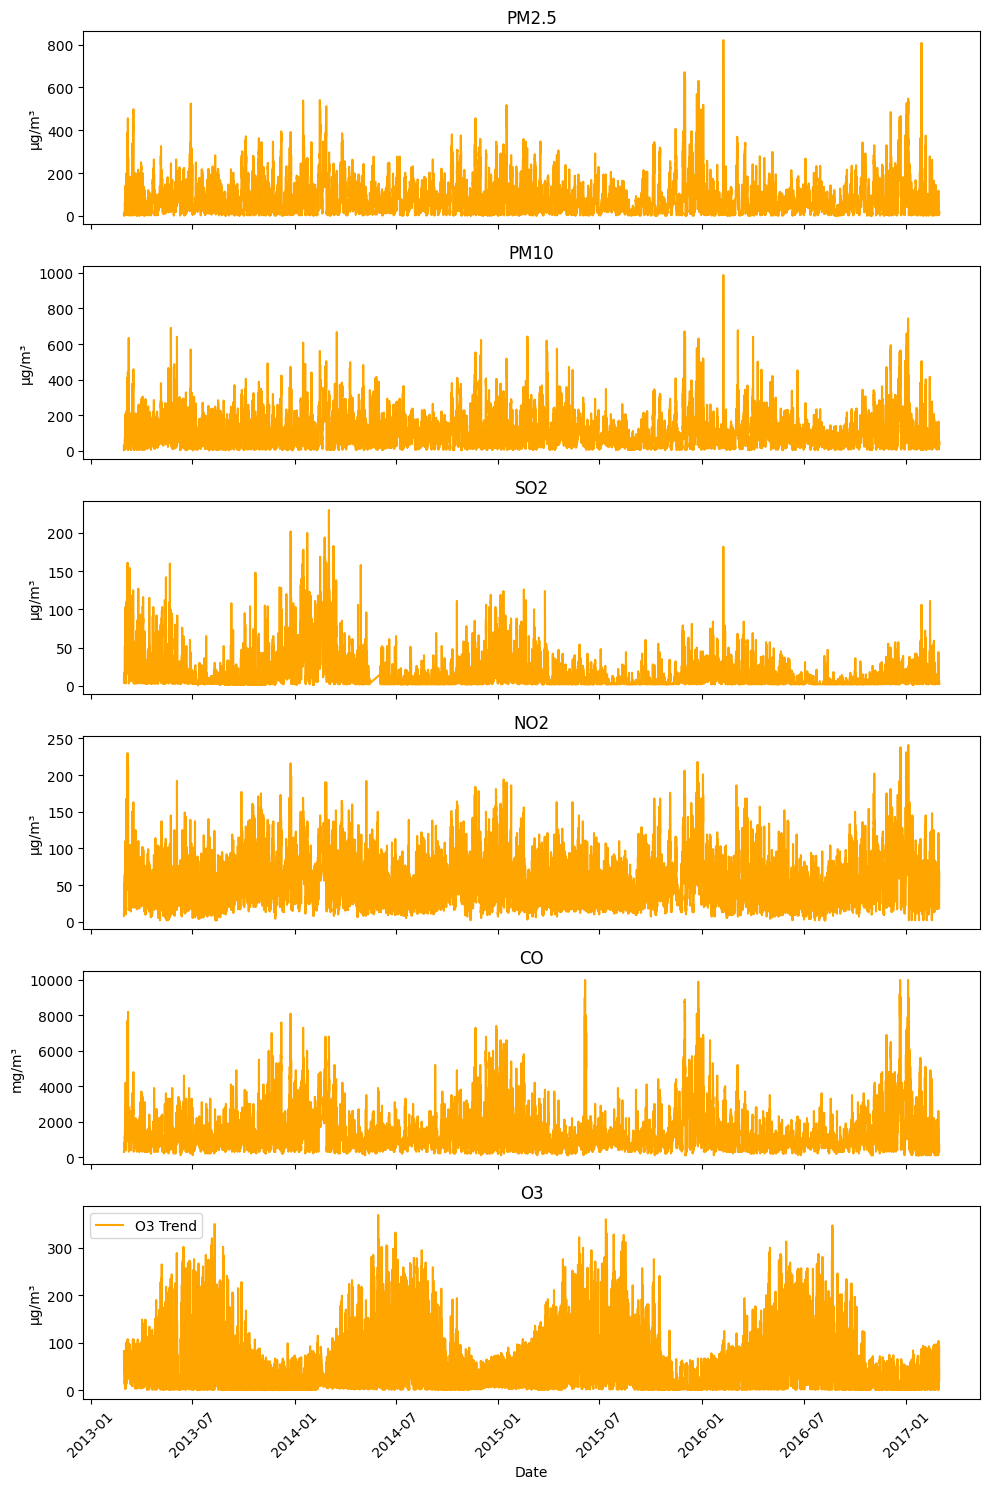

In [21]:
# Buat subplots berdasarkan kolom nuerik
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 15), sharex=True)

# Daftar kolom yang akan di buat subplot
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
labels = ["µg/m³", "µg/m³", "µg/m³", "µg/m³", "mg/m³", "µg/m³"]


# Loop kolom untuk menampilkan plot
for i, var in enumerate(columns):
    # Ambil data kolom
    data = tiantan_data[var]
    
    # Buat plot garis dari data
    axes[i].plot(tiantan_data['datetime'], data, color='orange', label=f'{var} Trend')
    
    # Tambah judul dan label
    axes[i].set_title(f'{var}')
    axes[i].set_ylabel(f'{labels[i]}')
    axes[i].tick_params(axis='x', rotation=45)

# Tampilkan X-Label
plt.xlabel('Date')

# Sesuaikn layout agar tidak overlap
plt.tight_layout()

# tambah legenda
plt.legend(loc='upper left')

# Tampilkan plot
plt.show()

Plot diatas merupakan tren polutan secara keseluruhan, tidak banyak kesimpulan yang bisa diambil karena data masih terlalu banyak

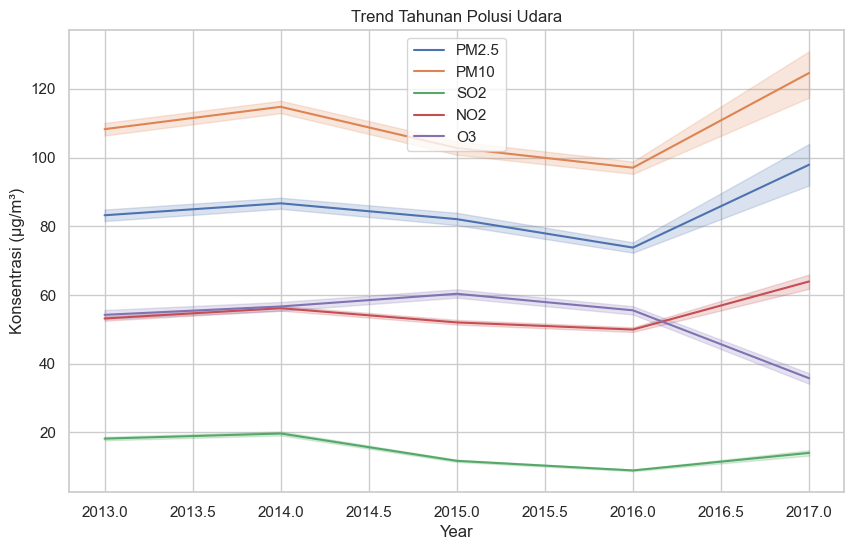

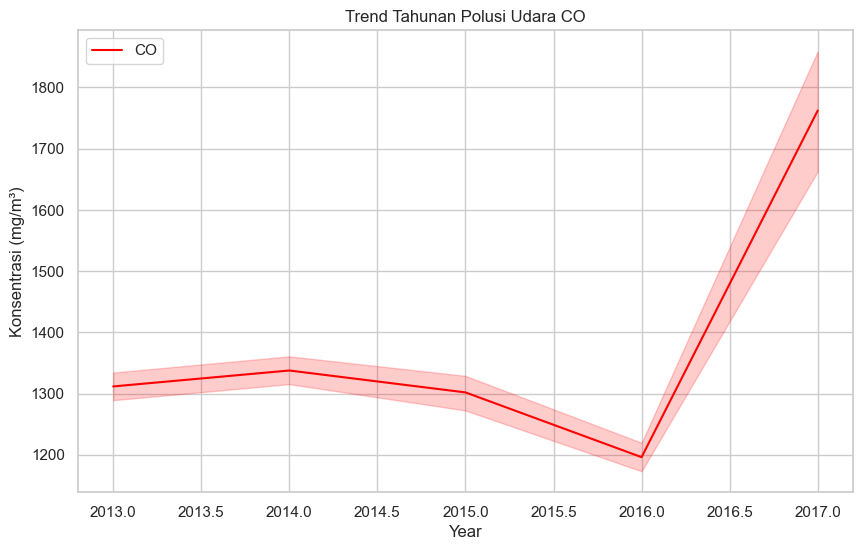

In [22]:
# Setting style pada sns
sns.set_theme(style="whitegrid")

# Plot kolom PM2.5, PM10, SO2, NO2, dan O3
plt.figure(figsize=(10, 6))
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
for col in columns_to_plot:
    sns.lineplot(x='year', y=col, data=tiantan_data_yearly, label=col)

# Tambahkan label dan judul pada plot pertama
plt.xlabel('Year')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Trend Tahunan Polusi Udara')
plt.legend()
plt.show()

# Plot untuk CO terpisah karena beda satuan
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='CO', data=tiantan_data_yearly, label='CO', color='red')

# Tambahkan label dan judul pada plot kedua
plt.xlabel('Year')
plt.ylabel('Konsentrasi (mg/m³)')
plt.title('Trend Tahunan Polusi Udara CO')
plt.legend()
plt.show()

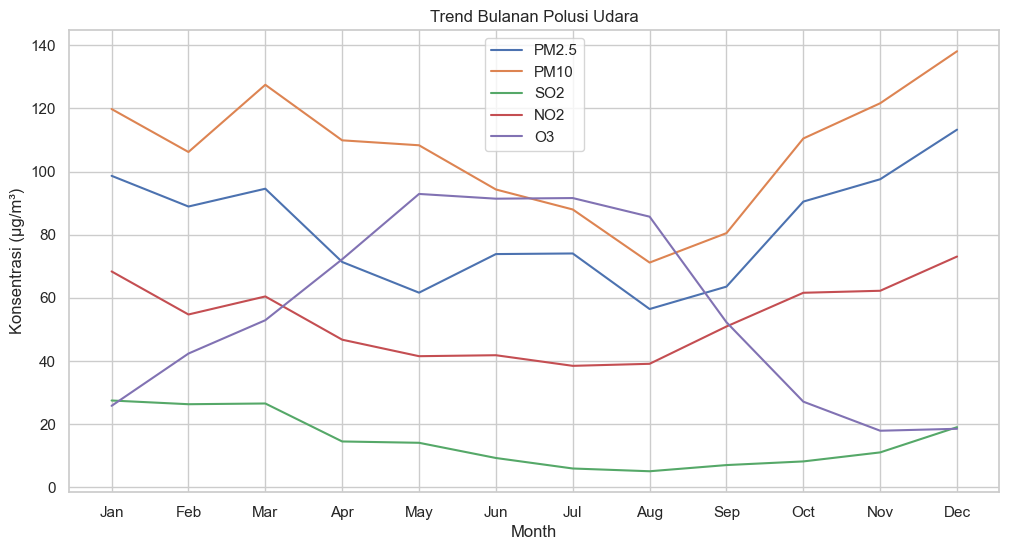

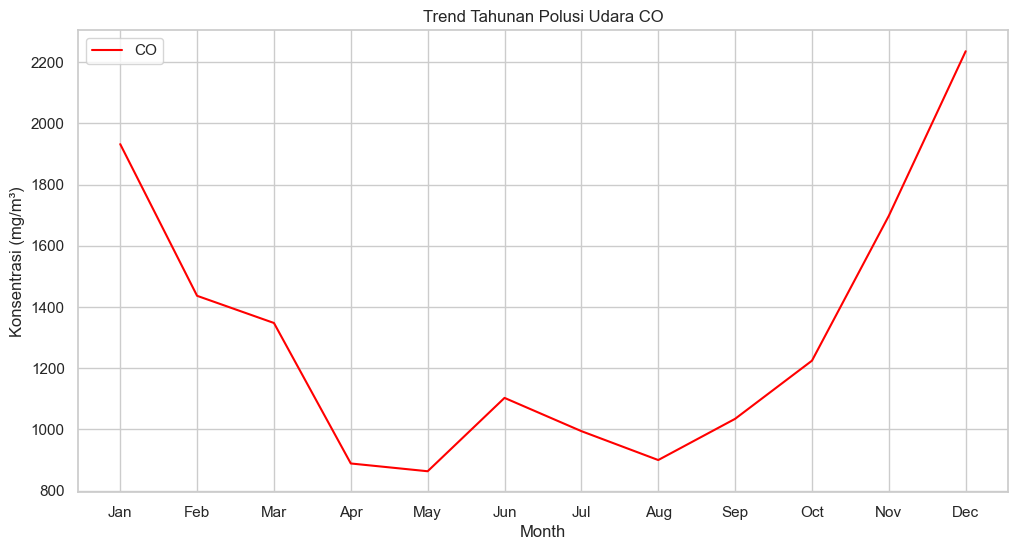

In [23]:
# Grup data perbulan dan hitung rata-ratanya
tiantan_data_monthly_avg = tiantan_data_monthly.groupby("month").mean(numeric_only=True)

# Setting tema
sns.set_theme(style="whitegrid")

# Plot kolom PM2.5, PM10, SO2, NO2, dan O3
plt.figure(figsize=(12, 6))
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
for col in columns_to_plot:
    sns.lineplot(x='month', y=col, data=tiantan_data_monthly_avg, label=col)

# Tambahkan label dan judul pada plot pertama
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Trend Bulanan Polusi Udara')
plt.legend()
plt.show()

# Plot kolom CO
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='CO', data=tiantan_data_monthly_avg, label='CO', color='red')

# Tambahkan label dan judul pada plot kedua
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Konsentrasi (mg/m³)')  # CO's unit is mg/m³
plt.title('Trend Tahunan Polusi Udara CO')
plt.legend()
plt.show()

### Pertanyaan 2: Apakah ada korelasi antar tiap polutan di stasiun Tiantan?

In [24]:
# Pilih hanya kolom polutan untuk analisis korelasi
pollutants = tiantan_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]

# Hitung matriks korelasi menggunakan Pearson
correlation_matrix = pollutants.corr(method='pearson')

# Print matriks korelasi
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.895311  0.398366  0.665639  0.801825 -0.168575
PM10   0.895311  1.000000  0.389034  0.628509  0.724097 -0.120388
SO2    0.398366  0.389034  1.000000  0.414529  0.409084 -0.054526
NO2    0.665639  0.628509  0.414529  1.000000  0.715840 -0.539392
CO     0.801825  0.724097  0.409084  0.715840  1.000000 -0.317173
O3    -0.168575 -0.120388 -0.054526 -0.539392 -0.317173  1.000000


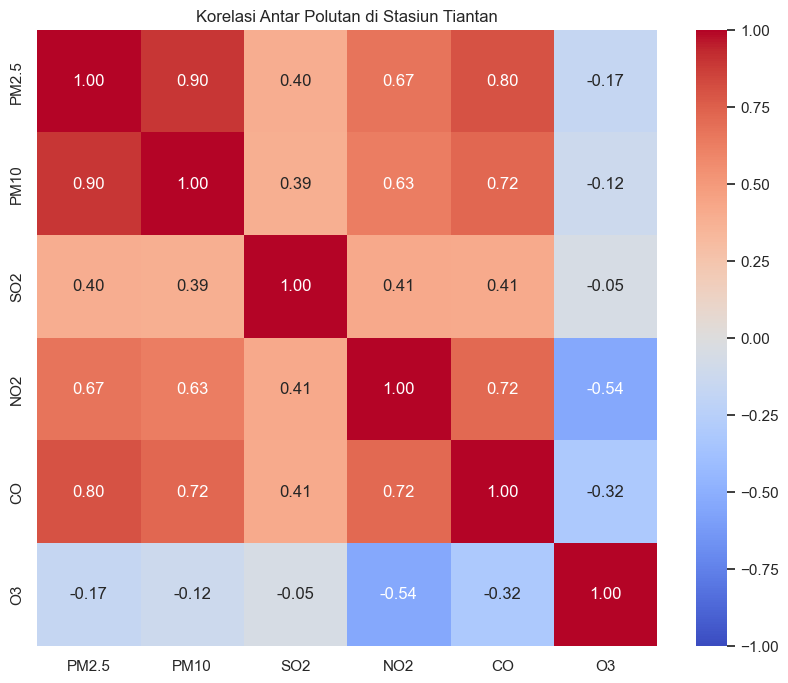

In [25]:
# Plot heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Tambahkan judul
plt.title('Korelasi Antar Polutan di Stasiun Tiantan')
plt.show()

### Pertanyaan 3: Apakah ada korelasi antara cuaca dan kualitas udara di stasiun Tiantan?

In [26]:
# Pilih kolom polutan dan cuaca
pollutants_weather = tiantan_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

In [27]:
# Hitung matriks korelasi menggunakan metode Pearson
correlation_matrix_weather = pollutants_weather.corr(method='pearson')

# Print matriks korelasi
print(correlation_matrix_weather)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.895311  0.398366  0.665639  0.801825 -0.168575 -0.152018   
PM10   0.895311  1.000000  0.389034  0.628509  0.724097 -0.120388 -0.120605   
SO2    0.398366  0.389034  1.000000  0.414529  0.409084 -0.054526 -0.236363   
NO2    0.665639  0.628509  0.414529  1.000000  0.715840 -0.539392 -0.324045   
CO     0.801825  0.724097  0.409084  0.715840  1.000000 -0.317173 -0.321562   
O3    -0.168575 -0.120388 -0.054526 -0.539392 -0.317173  1.000000  0.580450   
TEMP  -0.152018 -0.120605 -0.236363 -0.324045 -0.321562  0.580450  1.000000   
PRES   0.009322 -0.021922  0.171655  0.186279  0.156830 -0.429757 -0.837532   
DEWP   0.111542  0.058299 -0.229519 -0.082993 -0.037995  0.278624  0.819164   
RAIN  -0.015968 -0.028658 -0.038984 -0.047400 -0.014154  0.018655  0.038667   
WSPM  -0.291823 -0.178819 -0.044544 -0.412358 -0.326709  0.333490  0.048800   

           PRES      DEWP      RAIN      WSPM  
PM2

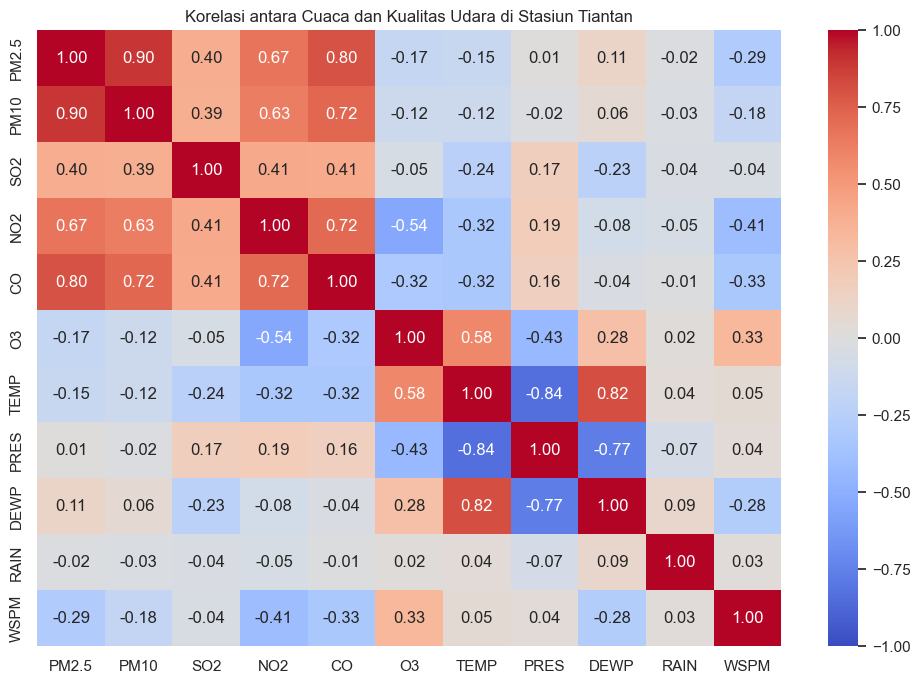

In [28]:
# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_weather, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Tambahkan judul
plt.title('Korelasi antara Cuaca dan Kualitas Udara di Stasiun Tiantan')
plt.show()

## Analisis Lanjutan (Clustering Manual Grouping)

In [29]:
# Atur kategori untuk PM2.5 berdasarkan EPA Airwatch 
# https://www.epa.vic.gov.au/for-community/environmental-information/air-quality/pm25-particles-in-the-air
def pm25_category(value):
    if value < 25:
        return 'Good'
    elif 25 <= value <= 50:
        return 'Fair'
    elif 51 <= value <= 100:
        return 'Poor'
    elif 101 <= value <= 300:
        return 'Very Poor'
    else:
        return 'Extremely Poor'

tiantan_data['PM2.5_Category'] = tiantan_data['PM2.5'].apply(pm25_category)
print(tiantan_data['PM2.5_Category'].value_counts())

PM2.5_Category
Very Poor         9448
Good              9445
Poor              8945
Fair              6389
Extremely Poor     837
Name: count, dtype: int64


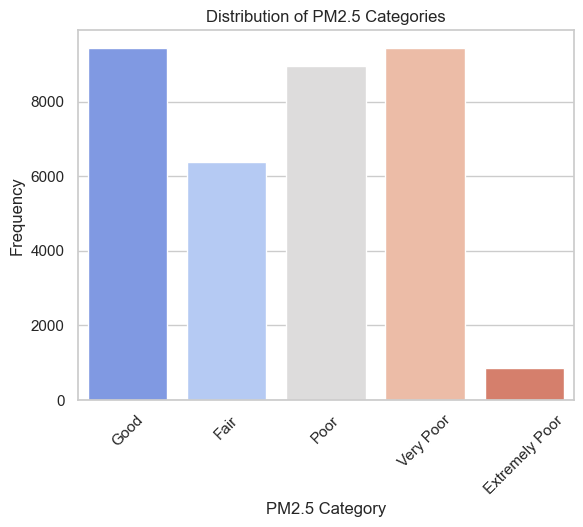

In [30]:
# Plot distribusi kategori PM2.5
sns.countplot(data=tiantan_data, x='PM2.5_Category', order=['Good', 'Fair', 'Poor', 'Very Poor', 'Extremely Poor'], palette='coolwarm', hue='PM2.5_Category')
plt.title('Distribution of PM2.5 Categories')
plt.xlabel('PM2.5 Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

PM2.5_Category
Very Poor         26.945015
Good              26.936459
Poor              25.510495
Fair              18.220967
Extremely Poor     2.387064
Name: proportion, dtype: float64


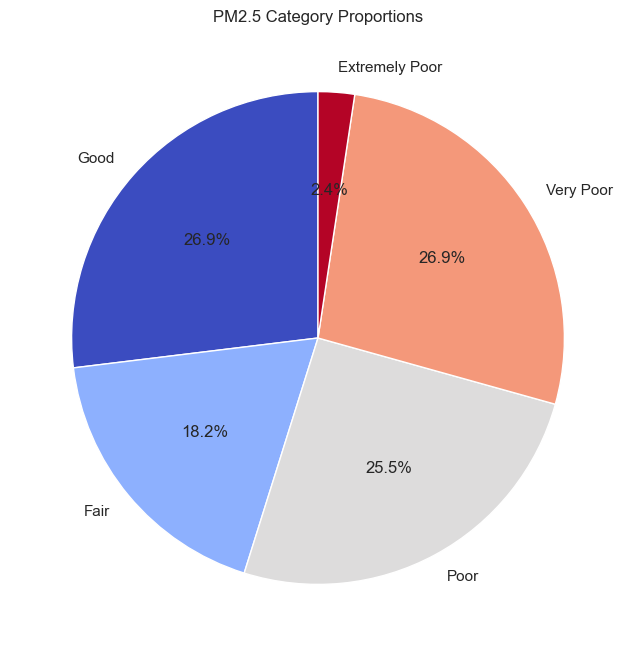

In [31]:
# Hitung proporsi kategori
category_proportion = tiantan_data['PM2.5_Category'].value_counts(normalize=True) * 100
print(category_proportion)

# Definisikan urutan label
category_order = ['Good', 'Fair', 'Poor', 'Very Poor', 'Extremely Poor']

# Sorting proporsi kategori
category_proportion_sorted = category_proportion[category_order]

# Pie chart untuk menunjukkan proporsi kategori
category_proportion_sorted.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='coolwarm')
plt.title('PM2.5 Category Proportions')
plt.ylabel('')
plt.show()

## Conclusion

### Bagaimana tren kualitas udara di stasiun Tiantan?

- Dari hasil plot tahunan di atas dapat disimpulkan bahwa pada tahun 2016, hampir setiap polutan mengalami penurunan.
- Tahun 2017 menunjukkan peningkatan signifikan pada PM2.5 (97.92) dan PM10 (124.62), yang lebih tinggi dibandingkan dengan tahun sebelumnya.
- Pada tahun 2017, kadar O3 menurun signifikan (35.77) dibandingkan dengan tahun-tahun sebelumnya, yang menunjukkan penurunan konsentrasi ozon.
- Dari hasil plot bulanan menunjukkan bahwa polusi udara menurun di pertengahan tahun, namun kembali meningkat di akhir tahun, polusi ini cenderung meningkat selama musim dingin (November hingga Januari), kecuali pada polusi O3 yang menunjukkan sebaliknya.
- Polusi O3 cenderung tinggi selama musim panas, dengan konsentrasi tertinggi pada bulan Mei (92.90 µg/m³), Juni (91.40 µg/m³), dan Juli (91.60 µg/m³)

### Apakah ada korelasi antar tiap polutan di stasiun Tiantan? 

- PM2.5 dan PM10: Korelasi sangat kuat (0.9), menunjukkan bahwa kedua jenis partikel ini mungkin berasal dari sumber yang sama atau dipengaruhi oleh kondisi lingkungan yang serupa.
- PM2.5, PM10, CO dan NO2 memiliki korelasi yang kuat, dibuktikan demngan nilai korelasi yang diatas 0.6. Menunjukkan bahwa polutan tersebut saling berkaitan, yang mungkin berasal dari sumber yang sama.
- PM2.5, PM10, CO dan NO2 e SO2 memiliki korelasi yang sedang hingga lemah, menunjukkan bahwa walaupun mungkin masih saling keterkaitan, namun bisa jadi sumber polutan tersebut memiliki sumber yang berbeda.
- Sedangkan polutan O3 berkorelasi negatif dengan polutan lainnya, ini menunjukkan bahwa polutan O3 akan meningkat jika polutan lainnya menurun. Hal ini bisa disebabkan karena O3 emiliki pola yang berbeda dengan polutan lainnya.

### Apakah ada korelasi antara cuaca dan kualitas udara di stasiun Tiantan?

- Secara keseluruhan, kondisi cuaca memiliki korelasi lemah terhadap polusi udara
- Suhu tinggi memiliki hubungan yang berbeda antar polutan, pada polutan SO2, NO2, dan CO akan cenderung menurun, namun meningkatkan polutan O3.
- Polutan SO2, NO2, dan CO cenderung lebih tinggi pada tekanan udara tinggi, sedangkan O3 cenderung lebih rendah.
- Polutan NO2 memiliki koelasi negatif lemah dengan suhu (-0.32) dan angin (-0.41), menunjukkan bahwa suhu lebih tinggi dan angin lebih kuat cenderung mengurangi konsentrasi NO2.

### Kategori PM2.5 berdasarkan EPA Airwatch

- Berdasarkan Frekuensi, kategory Very Poor dengan 9.448 jam (26,95%)  merupakan kategori paling sering terjadi, menunjukkan bahwa penduduk Tiantan cenderung menghisap udara dengan polusi tinggi.
- Total persentase udara tidak layak hirup di Tiantan berada di angka 54,85%, angka tersebut merupakan penjumlahan dari kategori Poor, Very Poor dan Extremely Poor
- Hanya 26,94% udara yang bebas dari polusi terjadi di Tiantan.

## Save Data to CSV

In [32]:
tiantan_data.to_csv("./dashboard/tiantan_data.csv", index=False)